## First step: imports 
The first important step to use SEVNpy to evolve stars is to import the SEVNmanager and the Star class from the subpackage sevnpy.sevn

In [1]:
from sevnpy.sevn import SEVNmanager, Star

## Second step: Initialise the SEVNmanager
In order to use the SEVN engine to evolve star, you have to initialise the SEVNmanager, calling the method init.
The method init accepts as input a dictionary including the key-value params-value, where params is as string referring to the SEVN runtime paramter and value is its value that can be a boolean, a number or a string depending on the parameter (see the [Userguide](https://gitlab.com/sevncodes/sevn/-/blob/SEVN/resources/SEVN_userguide.pdf?ref_type=heads)). 


If not input is provided, it will use the standard SEVN runtime parameters. During the initialisation the SEVNmanger also load the stellar tables. To close the current SEVNmanager instance call the method close. See the SEVNmanager [documentation](https://sevn.readthedocs.io/en/latest/api/_autosummary/sevnpy.sevn.sevnmanager.SEVNmanager.html#sevnpy.sevn.sevnmanager.SEVNmanager). 

You can see all the current runtime parameters used by the *SEVN engine calling the method SEVNmanager.get_sevnParams()*

**Notice:** you don't need to initiliase the SEVNmanager everytime you have to evolve a Star, just initiliase it at the beginning of your script. You have to close and re-initialise it only if you want to change the runtie parameter inside the same script  

In [2]:
# Simple example, initialise the SEVNmanager with standard input, look at the parameters and then close it

SEVNmanager.init() # Initialise 

print(SEVNmanager.get_sevnParams()) # Print all the runtime parameters currently used

SEVNmanager.close()  # CLose the runtime parameters 

{'check_stalling': True, 'ev_R_linear_interp': False, 'ev_set_maxCO': False, 'ev_set_minHE': False, 'gw_onlybco': False, 'optimistic_scenario_hg': False, 'rlo_QHE': False, 'rlo_enable_collision': False, 'rlo_mtstable_ms': True, 'rseed': False, 'tabuse_Xsup': False, 'tabuse_envconv': True, 'tabuse_inertia': False, 'tabuse_rco': True, 'tabuse_rhe': True, 'ts_check_NSspin': False, 'ts_check_spin': False, 'ts_check_spin_bse': False, 'use_thg_hurley': False, 'xspin_bavera': False, 'cemode': 'energy', 'circmode': 'angmom', 'collmode': 'hurley', 'ev_setwM': 'linear', 'ev_setwM_log': 'log', 'ev_setwM_tphase': 'rational', 'gwmode': 'peters', 'hardmode': 'disabled', 'inertiamode': 'Hurley', 'kmode': 'hurley_kick', 'log_level': 'error', 'mixmode': 'simple', 'name_prefix': '', 'rlmode': 'hurley_rl', 'rlo_stability': 'qcrit_Hradiative_stable', 'sn_kicks': 'unified', 'sn_neutrinomloss': 'lattimer89', 'sn_pairinstability': 'mapelli20', 'tables': '/Users/iogiul/SEVN_dir/SEVNpublic/tables/SEVNtracks_pa

In [3]:
# Initialise the SEVNmanager changing a default paramter, e.g. loading a new set of tables and changing the SN kicks model
new_param = {"tables":"/Users/iogiul/SEVN_dir/SEVNpublic/tables/SEVNtracks_MIST_AGB",
            "sn_kicks":"hobbs"}
SEVNmanager.init(new_param)
print(SEVNmanager.get_sevnParams()["sn_kicks"],SEVNmanager.get_sevnParams()["tables"])
SEVNmanager.close()

# Now initialise the SEVNmanager for the rest of this notebook  using default values
SEVNmanager.init()

hobbs /Users/iogiul/SEVN_dir/SEVNpublic/tables/SEVNtracks_MIST_AGB


## Initialise a Star
A Star is initiliased with the class *Star*, see the [documentation](https://sevn.readthedocs.io/en/latest/api/_autosummary/sevnpy.sevn.star.Star.html#sevnpy.sevn.star.Star), especially the one regarding the [initialisation parameter](https://sevn.readthedocs.io/en/latest/api/_autosummary/sevnpy.sevn.star.Star.html#sevnpy.sevn.star.Star.__init__)

The class *Star* accepts a number of input, but only two are necessarily required, i.e. the initial mass *Mzams* and metallicity *Z* of the star. 
Se below for a list of possibile initialisations.


In [6]:
## Standard initiliasitaion with Mzams and Z
s=Star(Mzams=10, Z=0.02) # Initialise a star with initial mass 10 and metallicity Z=0.02

## Set an rseed so to generate always the same exact evolutio and the same exact SN kicks (if any)
s=Star(Mzams=10, Z=0.02, rseed=42) # Initialise a star with initial mass 10 and metallicity Z=0.02

## Change the SN model (see the Userguide for different types of SN models, the default is rapid_gauNS)
s=Star(Mzams=10, Z=0.02, snmodel="delayed")

## Change the initial age of the Star, it can be both a number in Myr or the name of a SEVN phase: 
## zams, tams, shb, cheb, tcheb, sheb. The default is zams, 
## i.e. the time at which the Star starts to burn Hydrogen 
s=Star(Mzams=10, Z=0.02, tini=0.5) # Start at 0.5 Myr 
s=Star(Mzams=10, Z=0.02, tini="cheb") # Start at cheb phase, i.e. 
# when the Star stars to burn Helium in the core

## Change the initial masses of the Star (with respect to the interpolating track)
s=Star(Mzams=10, Z=0.02, Mass=8) # Set the initial mass to 8 
# for evolved stars, e.g. starting at the cheb phase, you can also set the initial mass of the core
s=Star(Mzams=10, Z=0.02, tini="cheb", Mass=8, MHE=2) # Set the initial mass to 8 

To have a quick summary of the current stellar properties and the initilisation parameters, you can just print the object

In [5]:
# Quick look to the stellar properties 
s=Star(Mzams=10, Z=0.02, tini="cheb", Mass=8, MHE=2) # Set the initial mass to 8 
print(s)

*** Init value ***
Mzams=10 Msun Z=0.02
Spin=0 Age=cheb
SN model=rapid_gauNS
*** Current properties ***
Worldtime=0
Localtime=21.8
Mass=8
Radius=442
Inertia=1.52e+05
Luminosity=2.87e+04
Temperature=3.57e+03
MHE=2
MCO=0
RHE=0.222
RCO=0
Phase=4
RemnantType=0
PhaseBSE=4
Spin=0
Ebind=-0.0508
Zams=10
Event=-1
dMRLOdt=0
dMaccwinddt=0
Plife=0
*** Tables  ***
H-tables: /Users/iogiul/SEVN_dir/SEVNpublic/tables/SEVNtracks_parsec_ov05_AGB
He-tables: /Users/iogiul/SEVN_dir/SEVNpublic/tables/SEVNtracks_parsec_pureHe36


## Evolve a star
Once a star is initliased, it can be evolved in two different ways:

- **_evolve_** method ([documentation](https://sevn.readthedocs.io/en/latest/api/_autosummary/sevnpy.sevn.star.Star.html#sevnpy.sevn.star.Star.evolve)): it has only one parameter *tend* that specifys the stopping time of the evolution, it can be the striing *end* (default), or a time in Myr. If it is *end*, the star is evolved until it is transformed in a compact remnant (white dwarf, black hole, neutron star). **Notice**: each time you call evolve, you overwrite all the evolutio done so far and you restart the evolution from the initiliasation starting time

In [7]:
# Example for evolve
s = Star(Mzams=10, Z=0.02)
s.evolve() # Evolve until the formation of a compact remnant
print("After evolving until the compact remnant formation:")
print(s)
s.evolve(tend=5) # Evolve for 5 Myr, notice the previous evolution will be overwritten
print("\n\nAfter evolving for 5 Myr:")
print(s)

After evolving until the compact remnant formation:
*** Init value ***
Mzams=10 Msun Z=0.02
Spin=0 Age=zams
SN model=rapid_gauNS
*** Current properties ***
Worldtime=23.1
Localtime=23.7
Mass=1.24
Radius=1.58e-05
Inertia=1.24e-10
Luminosity=2.31
Temperature=1.79e+06
MHE=0
MCO=0
RHE=0
RCO=0
Phase=7
RemnantType=5
PhaseBSE=13
Spin=0
Ebind=0
Zams=10
Event=0
dMRLOdt=0
dMaccwinddt=0
Plife=0
*** Tables  ***
H-tables: /Users/iogiul/SEVN_dir/SEVNpublic/tables/SEVNtracks_parsec_ov05_AGB
He-tables: /Users/iogiul/SEVN_dir/SEVNpublic/tables/SEVNtracks_parsec_pureHe36


After evolving for 5 Myr:
*** Init value ***
Mzams=10 Msun Z=0.02
Spin=0 Age=zams
SN model=rapid_gauNS
*** Current properties ***
Worldtime=5
Localtime=5.55
Mass=10
Radius=4.38
Inertia=19.2
Luminosity=6.65e+03
Temperature=2.49e+04
MHE=0
MCO=0
RHE=0
RCO=0
Phase=1
RemnantType=0
PhaseBSE=1
Spin=0
Ebind=0
Zams=10
Event=-1
dMRLOdt=0
dMaccwinddt=0
Plife=0.236
*** Tables  ***
H-tables: /Users/iogiul/SEVN_dir/SEVNpublic/tables/SEVNtracks_pars

- **_evolve_for_** method ([documentation](https://sevn.readthedocs.io/en/latest/api/_autosummary/sevnpy.sevn.star.Star.html#sevnpy.sevn.star.Star.evolve_for)): it has only one parameter *dt*  with no default values and it accepts numerical values in Myr. With this method, the evolution starts from the current status of the Star and evolve it for a timestep *dt*. **Notice**: this method is particulary suited for coupling SEVN with fireworks, since *dt* can be exactly the evolution timestep in the Nbody evolution

In [8]:
# Example for evolve_for
s = Star(Mzams=10, Z=0.02)
s.evolve_for(dt=1) # Evolve for 1 Myr
s.evolve_for(dt=2) # Now evolve again for 2 Myr
print("After evolving for 1+2=3 Myr:")
print(s)

After evolving for 1+2=3 Myr:
*** Init value ***
Mzams=10 Msun Z=0.02
Spin=0 Age=zams
SN model=rapid_gauNS
*** Current properties ***
Worldtime=3
Localtime=3.55
Mass=10
Radius=4.16
Inertia=17.3
Luminosity=6.25e+03
Temperature=2.52e+04
MHE=0
MCO=0
RHE=0
RCO=0
Phase=1
RemnantType=0
PhaseBSE=1
Spin=0
Ebind=0
Zams=10
Event=-1
dMRLOdt=0
dMaccwinddt=0
Plife=0.142
*** Tables  ***
H-tables: /Users/iogiul/SEVN_dir/SEVNpublic/tables/SEVNtracks_parsec_ov05_AGB
He-tables: /Users/iogiul/SEVN_dir/SEVNpublic/tables/SEVNtracks_parsec_pureHe36


## Retrieving properties

### evolve table
The stellar properties are stored in a pandas dataframe that can be retrieved accessing the class member *evolve_table*. 
To know the meaning and the units of all the properties in the dataframe, see the SEVN [Userguide](https://gitlab.com/sevncodes/sevn/-/blob/SEVN/resources/SEVN_userguide.pdf?ref_type=heads).
**Notice**, the table reports always the timestep made by SEVN.


In [9]:
s = Star(Mzams=50, Z=0.02)
s.evolve(tend=1)
s.evolve_table

Worldtime  Localtime       Mass     Radius     Inertia     Luminosity  \
0   0.000000   0.081707  49.854505   9.548858  454.576764  370597.921322   
1   0.374802   0.456509  49.158311  10.245565  516.022690  384818.164502   
2   0.650388   0.732096  48.646410  10.790069  566.368727  395621.023337   
3   0.923444   1.005151  48.139210  11.358109  621.027739  406623.745721   
4   1.000000   1.081707  47.997007  11.522671  637.265559  409763.131494   

    Temperature  MHE  MCO  RHE  ...  Phase  RemnantType  PhaseBSE  Spin  \
0  46086.806865  0.0  0.0  0.0  ...    1.0          0.0       1.0   0.0   
1  44913.045908  0.0  0.0  0.0  ...    1.0          0.0       1.0   0.0   
2  44069.112381  0.0  0.0  0.0  ...    1.0          0.0       1.0   0.0   
3  43248.570286  0.0  0.0  0.0  ...    1.0          0.0       1.0   0.0   
4  43021.270119  0.0  0.0  0.0  ...    1.0          0.0       1.0   0.0   

   Ebind  Zams  Event  dMRLOdt  dMaccwinddt     Plife  
0    0.0  50.0   -1.0      0.0          0.0  0.000000  
1    0.0  50.0   -1.0      0.0          0.0  0.100000  
2    0.0  50.0   -1.0      0.0          0.0  0.173528  
3    0.0  50.0   -1.0      0.0          0.0  0.246382  
4    0.0  50.0   -1.0      0.0          0.0  0.266807  

[5 rows x 21 columns]

Index(['Worldtime', 'Localtime', 'Mass', 'Radius', 'Inertia', 'Luminosity',
       'Temperature', 'MHE', 'MCO', 'RHE', 'RCO', 'Phase', 'RemnantType',
       'PhaseBSE', 'Spin', 'Ebind', 'Zams', 'Event', 'dMRLOdt', 'dMaccwinddt',
       'Plife'],
      dtype='object')


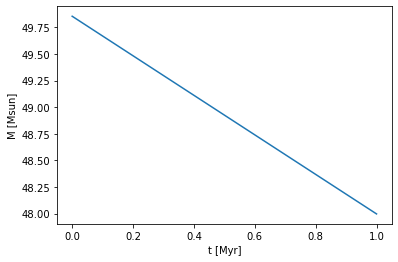

In [10]:
# To work with the evolve_table assign it to a variable, e.g. 
df = s.evolve_table
# To look at all the available properties
print(df.columns)
# To retrieve a particular property, e.g. time and mass 
time = df["Worldtime"]
mass = df["Mass"]
# Let's plot it
import matplotlib.pyplot as plt
plt.plot(time,mass)
plt.xlabel("t [Myr]")
plt.ylabel("M [Msun]")
plt.show()

### direct access

- **_getp_** ([Documentation](https://sevn.readthedocs.io/en/latest/api/_autosummary/sevnpy.sevn.star.Star.html#sevnpy.sevn.star.Star.getp)):The properties of the evolve tables can be accessed directly with the method getp adding the name of the properties. The optional input mode can be set to get only the firs or the last values of the properties. It is also possiible to use more than one columne name. The return is a pandas dataframe
- **_getp_** ([Documentation](https://sevn.readthedocs.io/en/latest/api/_autosummary/sevnpy.sevn.star.Star.html#sevnpy.sevn.star.Star.getp_array)):Same as **_getp_**  but it will returns a numpy array

In [11]:
# Get directly the Mass from the evolve table
s.getp("Mass") 
# Get only the last value of mass
s.getp("Mass",mode="last")
# Get all the  value of  Worldtime, Mass and Temperature and Radius
s.getp(["Worldtime","Mass","Radius","Temperature"])


Worldtime       Mass     Radius   Temperature
0   0.000000  49.854505   9.548858  46086.806865
1   0.374802  49.158311  10.245565  44913.045908
2   0.650388  48.646410  10.790069  44069.112381
3   0.923444  48.139210  11.358109  43248.570286
4   1.000000  47.997007  11.522671  43021.270119

In [12]:
# Get all the  value of  Worldtime, Mass and Temperature and Radius returnin a numpy array
s.getp_array(["Worldtime","Mass","Radius","Temperature"])

array([[0.00000000e+00, 4.98545049e+01, 9.54885750e+00, 4.60868069e+04],
       [3.74802242e-01, 4.91583105e+01, 1.02455653e+01, 4.49130459e+04],
       [6.50388432e-01, 4.86464098e+01, 1.07900693e+01, 4.40691124e+04],
       [9.23443708e-01, 4.81392102e+01, 1.13581087e+01, 4.32485703e+04],
       [1.00000000e+00, 4.79970071e+01, 1.15226706e+01, 4.30212701e+04]])

### Remnant and kick properties

SEVNpy allows to access directly the properties of the remant and the SN kick:

- **_get_remnant_**  ([Documentation](https://sevn.readthedocs.io/en/latest/api/_autosummary/sevnpy.sevn.star.Star.html#sevnpy.sevn.star.Star.get_remnant)): return a one-row pandas dataframe containing the properties of the remnant produced by the stellar evolution. The time of the remnant formation is stored in the column *Worldtime*, the mass of the remnant in the column *Mass* and the remnant type (1-3 White dwarf, 4-5 neutron star, 6 black hole, 7 massless remnanat, i.e, no remnant) in the column *RemnantType*. *Notice*, you can get this properties without running the Star evolution.
- **_get_SN_kick_** ([Documentation](https://sevn.readthedocs.io/en/latest/api/_autosummary/sevnpy.sevn.star.Star.html#sevnpy.sevn.star.Star.get_SN_kicks)): 

In [16]:
s = Star(Mzams=20, Z=0.02)
dfrem=s.get_remnant()
# Get the mass of the remnant, the remnant formation time and the remnant type
Mrem=dfrem["Mass"].values # to get only the value
Trem=dfrem["Worldtime"].values # to get only the value
Typerem=dfrem["RemnantType"].values  # to get only the value
print(f"A remnant of mass {Mrem} Msun and remnant type {Typerem} has been formed at time {Trem} Myr")

A remnant of mass [1.40722884] Msun and remnant type [5.] has been formed at time [8.56877509] Myr


- **_get_SN_kick_** ([Documentation](https://sevn.readthedocs.io/en/latest/api/_autosummary/sevnpy.sevn.star.Star.html#sevnpy.sevn.star.Star.get_SN_kicks)): Once a remnant has been formed in the evolution, the SN kicks (if any) can be retrieve with this method. It returns a dictionary with two keys:
    
    - *SNtime*: it stores the SN explosion time in Myr. 
    - *Vkick*: it contains the three components of the SN kick, they can be assumed to be in spherical coordinates (r, phi, theta). They can be all 0. (in case on an implosion for example) or nan (see below)
    
**Notice** in this case we define SN every transition to  a neutron star or black hole even if an implosion took place. In case there are not transitions to a neutron star or black hole in the evolve table (because the evolution does not reach the SN time or because a white dwarf has been formed). 
**Notice-2**  the SN kicks are randomly drawn, therefore everytime you evolve a star with the same Mzams and Z they will have different values. In order to remove the stocasticity, set the rseed when initiliasing the star 

In [35]:
# Case-1 high mass star fully evolved
s = Star(Mzams=30, Z=0.02, rseed=10)
s.evolve()
print("\n Case-1 high mass star fully evolved",s.get_SN_kick())

# Case-2 high mass not fully evolved, the SN explosion has not triggered yet
s = Star(Mzams=30, Z=0.02, rseed=10)
s.evolve(tend=0.5)
print("\n Case-2 high mass star fully evolved",s.get_SN_kick())

# Case-3 low mass star transformed to a white dwarf, SN never happened
s = Star(Mzams=4, Z=0.02, rseed=10)
s.evolve()
print("\n Case-3 low mass star transformed to a white dwarf",s.get_SN_kick())

# Case-4 Very high-mass star transformed to a BH through an implosion 
s = Star(Mzams=50, Z=0.02, rseed=10)
s.evolve()
print("\n Case-4 Very high-mass star transformed to a BH through an implosion ",s.get_SN_kick())

# Case-5 intermediate mass star fully evolved
s = Star(Mzams=15, Z=0.02, rseed=10)
s.evolve()
print("\n Case-5 intermediate mass star fully evolved",s.get_SN_kick())


 Case-1 high mass star fully evolved {'SNtime': 5.796634, 'Vkick': array([  7.17264,   1.86735, -12.6879 ])}

 Case-2 high mass star fully evolved {'SNtime': nan, 'Vkick': array([nan, nan, nan])}

 Case-3 low mass star transformed to a white dwarf {'SNtime': nan, 'Vkick': array([nan, nan, nan])}

 Case-4 Very high-mass star transformed to a BH through an implosion  {'SNtime': 4.129775, 'Vkick': array([ 0.,  0., -0.])}

 Case-5 intermediate mass star fully evolved {'SNtime': 12.29053, 'Vkick': array([ 498.268,  167.591, -185.028])}


In [36]:
# Finally, close the SEVNmanager
SEVNmanager.close()